In [76]:
import numpy as np
import pandas as pd
import pycountry_convert
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [77]:
df_world = pd.read_csv('./data/world_bank_data2.csv')
df_world.head()

,Series Name,Series Code,Country Name,Country Code,2018 [YR2018]
0,Domestic general government health expenditure...,SH.XPD.GHED.PC.CD,Afghanistan,AFG,2.721409
1,Domestic general government health expenditure...,SH.XPD.GHED.PC.CD,Africa Eastern and Southern,AFE,45.003226
2,Domestic general government health expenditure...,SH.XPD.GHED.PC.CD,Africa Western and Central,AFW,12.909946
3,Domestic general government health expenditure...,SH.XPD.GHED.PC.CD,Albania,ALB,148.436569
4,Domestic general government health expenditure...,SH.XPD.GHED.PC.CD,Algeria,DZA,168.575678


In [78]:
df_world["Series Name"].unique()

array(['Domestic general government health expenditure per capita (current US$)',
       'Number of under-five deaths', 'Population, total',
       'Number of stillbirths', 'Number of infant deaths'], dtype=object)

In [79]:
df_ = df_world.drop(columns=["Series Code"])
df_.head()

,Series Name,Country Name,Country Code,2018 [YR2018]
0,Domestic general government health expenditure...,Afghanistan,AFG,2.721409
1,Domestic general government health expenditure...,Africa Eastern and Southern,AFE,45.003226
2,Domestic general government health expenditure...,Africa Western and Central,AFW,12.909946
3,Domestic general government health expenditure...,Albania,ALB,148.436569
4,Domestic general government health expenditure...,Algeria,DZA,168.575678


In [80]:
keys_ = ["Country Name","Country Code"] + list(df_world['Series Name'].unique())
keys_



['Country Name',
 'Country Code',
 'Domestic general government health expenditure per capita (current US$)',
 'Number of under-five deaths',
 'Population, total',
 'Number of stillbirths',
 'Number of infant deaths']

In [81]:
# create a new dictionary to form a new dataframe
dict_ = {}
for k in keys_:
    dict_[k] = []

for i, row in df_world.iterrows():
    # append country to the country column
    dict_['Country Name'].append(row['Country Name'])
    dict_['Country Code'].append(row['Country Code'])
    # iterate through the series name
    # if the current row's series name matchs the series name in the keys
    # append the value the current series name column and append nan to the res of series names
    for k in range(2,len(keys_)):
        if (row['Series Name'] == keys_[k]):
            if (row['2018 [YR2018]'] == ".."):
                dict_[keys_[k]].append(np.nan)
            else:
                dict_[row['Series Name']].append(float(row['2018 [YR2018]']))
        else:
            dict_[row['Series Name']].append(np.nan)

# print(len(dict_['Country Name']))
# print(len(dict_['Country Code']))

# for k in keys_:
#     print(k)
#     print(len(dict_[k]))

new_df = pd.DataFrame.from_dict(dict_)

# show the new dataframe

new_df.head()

,Country Name,Country Code,Domestic general government health expenditure per capita (current US$),Number of under-five deaths,"Population, total",Number of stillbirths,Number of infant deaths
0,Afghanistan,AFG,2.721409,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,74352.0,NaN,NaN,NaN
2,Africa Western and Central,AFW,NaN,NaN,37171922.0,NaN,NaN
3,Albania,ALB,NaN,NaN,NaN,35934.0,NaN
4,Algeria,DZA,NaN,NaN,NaN,NaN,57231.0


In [82]:
# group by country name. 
df_clean = new_df.groupby(by=["Country Name","Country Code"]).mean()
df_clean.head()

,,Domestic general government health expenditure per capita (current US$),Number of under-five deaths,"Population, total",Number of stillbirths,Number of infant deaths
Country Name,Country Code,,,,,
Afghanistan,AFG,2.721409,176.0,352721.0,107219.0,105.0
Africa Eastern and Southern,AFE,NaN,74352.0,4087843.0,8.0,188147.0
Africa Western and Central,AFW,126.881701,NaN,37171922.0,112.0,7.0
Albania,ALB,142.342167,219235.0,40895.0,35934.0,149.0
Algeria,DZA,877.439031,5276746.0,382955167.0,NaN,57231.0


In [83]:
# reset the index to get rid of multi index
df_clean = df_clean.reset_index()
df_clean.head(100)

,Country Name,Country Code,Domestic general government health expenditure per capita (current US$),Number of under-five deaths,"Population, total",Number of stillbirths,Number of infant deaths
0,Afghanistan,AFG,2.721409,176.0,352721.0,107219.0,105.0
1,Africa Eastern and Southern,AFE,NaN,74352.0,4087843.0,8.0,188147.0
2,Africa Western and Central,AFW,126.881701,NaN,37171922.0,112.0,7.0
3,Albania,ALB,142.342167,219235.0,40895.0,35934.0,149.0
4,Algeria,DZA,877.439031,5276746.0,382955167.0,NaN,57231.0
...,...,...,...,...,...,...,...
95,Guatemala,GTM,521.430273,1566.0,25549606.0,170558.0,1978252.0
96,Guinea,GIN,13.086263,40.0,1136274.0,3120.0,551611.0
97,Guinea-Bissau,GNB,5153.727131,79319.0,286640.0,407.0,4842.0
98,Guyana,GUY,1486.904996,27499.0,41801532.0,23.0,1177.0


In [84]:
cols = ["Country","Country Code", "Helth_Exp","Under_five_Death","Population","Stillbirths","Infant_Deaths"]
df_clean.columns = cols

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           266 non-null    object 
 1   Country Code      266 non-null    object 
 2   Helth_Exp         231 non-null    float64
 3   Under_five_Death  237 non-null    float64
 4   Population        260 non-null    float64
 5   Stillbirths       237 non-null    float64
 6   Infant_Deaths     237 non-null    float64
dtypes: float64(5), object(2)
memory usage: 14.7+ KB


In [85]:
df_clean["Under_five_Death_w"] = (df_clean["Under_five_Death"]/df_clean["Population"]) * 100
df_clean["Stillbirths_w"] = (df_clean["Stillbirths"]/df_clean["Population"]) * 100
df_clean["Infant_Deaths_w"] = (df_clean["Infant_Deaths"]/df_clean["Population"]) * 100


In [86]:
df18 = pd.read_csv('./data/2018.csv')
cols = ["Overall rank","Country or region","Score"]
df18 = df18[cols]
# Generate a country code for each country in the Happiness dataset
# use pycountry_convert to get the country code. It throws an exception if the country is not found.
# for now assign NaN to those and evaluate those separately. 
emp = []
for c in df18["Country or region"]:
    try:
        emp.append(pycountry_convert.country_name_to_country_alpha3(c))
    except:
        emp.append(np.nan)

df18["Country Code"] = emp

df18["Country Code"][df18["Country or region"] == "Trinidad & Tobago"] = "TTO"
df18["Country Code"][df18["Country or region"] == "Kosovo"] = "XKX"
df18["Country Code"][df18["Country or region"] == "Congo (Brazzaville)"] = "CGX"
df18["Country Code"][df18["Country or region"] == "Congo (Kinshasa)"] = "CDX"
df18["Country Code"][df18["Country or region"] == "Palestinian Territories"] = "PSE"



<ipython-input-86-df009b9d22b9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df18["Country Code"][df18["Country or region"] == "Trinidad & Tobago"] = "TTO"
<ipython-input-86-df009b9d22b9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df18["Country Code"][df18["Country or region"] == "Kosovo"] = "XKX"
<ipython-input-86-df009b9d22b9>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df18["Country Code"][df18["Country or region"]

In [87]:
df = pd.merge(df18, df_clean, on=["Country Code"])

In [88]:
df.head(10)
df = df.dropna()


In [89]:
df.tail(10)


,Overall rank,Country or region,Score,Country Code,Country,Helth_Exp,Under_five_Death,Population,Stillbirths,Infant_Deaths,Under_five_Death_w,Stillbirths_w,Infant_Deaths_w
139,143,Madagascar,3.774,MDG,Madagascar,10.091457,4.0,103199.0,22369.0,1599198.0,0.003876,21.675598,1549.625481
140,144,Zimbabwe,3.692,ZWE,Zimbabwe,843.927859,9.0,448974232.0,102.0,17196.0,0.000002,0.000023,0.003830
141,145,Afghanistan,3.632,AFG,Afghanistan,2.721409,176.0,352721.0,107219.0,105.0,0.049898,30.397680,0.029769
143,147,Malawi,3.587,MWI,Malawi,3536.843883,2007534.0,17911.0,20.0,39558.0,11208.385908,0.111663,220.858690
144,148,Haiti,3.582,HTI,Haiti,5.661163,1254.0,363967202.0,31620.0,37.0,0.000345,0.008688,0.000010
145,149,Liberia,3.495,LBR,Liberia,3547.373013,178124.0,2455336.0,495.0,142.0,7.254567,0.020160,0.005783
149,153,Tanzania,3.303,TZA,Tanzania,279.254738,4617.0,107001.0,5368.0,1308367.0,4.314913,5.016776,1222.761470
150,154,South Sudan,3.254,SSD,South Sudan,164.141924,225.0,170496.0,2227.0,3801.0,0.131968,1.306189,2.229378
151,155,Central African Republic,3.083,CAF,Central African Republic,17.267145,10.0,10627147.0,13502.0,11907.0,0.000094,0.127052,0.112043
152,156,Burundi,2.905,BDI,Burundi,318.108128,21157.0,622227.0,19874.0,2.0,3.400206,3.194011,0.000321


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 152
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Overall rank        89 non-null     int64  
 1   Country or region   89 non-null     object 
 2   Score               89 non-null     float64
 3   Country Code        89 non-null     object 
 4   Country             89 non-null     object 
 5   Helth_Exp           89 non-null     float64
 6   Under_five_Death    89 non-null     float64
 7   Population          89 non-null     float64
 8   Stillbirths         89 non-null     float64
 9   Infant_Deaths       89 non-null     float64
 10  Under_five_Death_w  89 non-null     float64
 11  Stillbirths_w       89 non-null     float64
 12  Infant_Deaths_w     89 non-null     float64
dtypes: float64(9), int64(1), object(3)
memory usage: 9.7+ KB


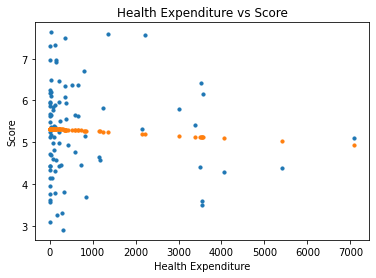

In [91]:
# plot score vs expenditure
# increase size of plt


# plt.figure(figsize=(10, 10))

df_ = df.dropna(subset=["Helth_Exp"])
df_ = df_[df_[""]]

plt.scatter(df_["Helth_Exp"], df_["Score"], s=10)
plt.xlabel("Health Expenditure")
plt.ylabel("Score")
plt.title("Health Expenditure vs Score")

reg = LinearRegression().fit(df_["Helth_Exp"].values.reshape(-1,1), df_["Score"])

y_pred = reg.predict(df_["Helth_Exp"].values.reshape(-1,1))

plt.scatter(df_["Helth_Exp"], y_pred, s=10)

# plt.scatter([1,2,3],[4,5,6])
plt.show()


In [ ]:
df_ = df.dropna(subset=["Helth_Exp"])
df_ = df_[df_[""]]

plt.scatter(df_["Helth_Exp"], df_["Score"], s=10)
plt.xlabel("Health Expenditure")
plt.ylabel("Score")
plt.title("Health Expenditure vs Score")

reg = LinearRegression().fit(df_["Helth_Exp"].values.reshape(-1,1), df_["Score"])

y_pred = reg.predict(df_["Helth_Exp"].values.reshape(-1,1))

plt.scatter(df_["Helth_Exp"], y_pred, s=10)

# plt.scatter([1,2,3],[4,5,6])
plt.show()
